In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets with duration column
train_df = pd.read_csv("train_data_with_duration.csv")
valid_df = pd.read_csv("valid_data_with_duration.csv")
test_df = pd.read_csv("test_data_with_duration.csv")


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: uvicorn 0.14.0 has a non-standard dependency specifier click>=7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of uvicorn or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
# Combine all datasets for full dataset analysis
full_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

In [4]:
# Checking the structure of each dataset
train_info = train_df.info()
valid_info = valid_df.info()
test_info = test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23132 entries, 0 to 23131
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   path           23132 non-null  object 
 1   speakerId      23132 non-null  object 
 2   transcription  23132 non-null  object 
 3   action         23132 non-null  object 
 4   object         23132 non-null  object 
 5   location       23132 non-null  object 
 6   duration       23132 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   path           3118 non-null   object 
 1   speakerId      3118 non-null   object 
 2   transcription  3118 non-null   object 
 3   action         3118 non-null   object 
 4   object         3118 non-null   object 
 5   location       3118 non-n

In [5]:
# train_info, valid_info, test_info

In [6]:
# Checking missing values across all datasets
missing_values_train = train_df.isnull().sum()
missing_values_valid = valid_df.isnull().sum()
missing_values_test = test_df.isnull().sum()


missing_values_train, missing_values_valid, missing_values_test

(path             0
 speakerId        0
 transcription    0
 action           0
 object           0
 location         0
 duration         0
 dtype: int64,
 path             0
 speakerId        0
 transcription    0
 action           0
 object           0
 location         0
 duration         0
 dtype: int64,
 path             0
 speakerId        0
 transcription    0
 action           0
 object           0
 location         0
 duration         0
 dtype: int64)

In [7]:
# Summary statistics of duration
duration_summary = full_df['duration'].describe()

# Check for missing or extreme values
missing_durations = full_df['duration'].isnull().sum()
zero_durations = (full_df['duration'] == 0).sum()

# Display statistics
duration_summary, missing_durations, zero_durations

(count    30043.000000
 mean         2.305702
 std          0.637891
 min          0.650204
 25%          1.877324
 50%          2.218730
 75%          2.645351
 max         13.226712
 Name: duration, dtype: float64,
 0,
 0)

In [8]:
# Checking the number of unique labels in key categorical columns
unique_labels = {
    "Actions": train_df["action"].nunique(),
    "Objects": train_df["object"].nunique(),
    "Locations": train_df["location"].nunique(),
    "Speakers": train_df["speakerId"].nunique()
}

unique_labels

{'Actions': 6, 'Objects': 14, 'Locations': 4, 'Speakers': 77}

In [9]:
# Action Distribution
action_dist_train = train_df["action"].value_counts(normalize=True)
action_dist_valid = valid_df["action"].value_counts(normalize=True)
action_dist_test = test_df["action"].value_counts(normalize=True)

# Object Distribution
object_dist_train = train_df["object"].value_counts(normalize=True)
object_dist_valid = valid_df["object"].value_counts(normalize=True)
object_dist_test = test_df["object"].value_counts(normalize=True)

# Location Distribution
location_dist_train = train_df["location"].value_counts(normalize=True)
location_dist_valid = valid_df["location"].value_counts(normalize=True)
location_dist_test = test_df["location"].value_counts(normalize=True)

# Combine for display
action_dist_df = pd.DataFrame({
    "Train": action_dist_train,
    "Validation": action_dist_valid,
    "Test": action_dist_test
}).fillna(0)

object_dist_df = pd.DataFrame({
    "Train": object_dist_train,
    "Validation": object_dist_valid,
    "Test": object_dist_test
}).fillna(0)

location_dist_df = pd.DataFrame({
    "Train": location_dist_train,
    "Validation": location_dist_valid,
    "Test": location_dist_test
}).fillna(0)

C:\Users\kasul\AppData\Local\Temp\ipykernel_32436\2567982617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_df, x="action", palette="coolwarm")


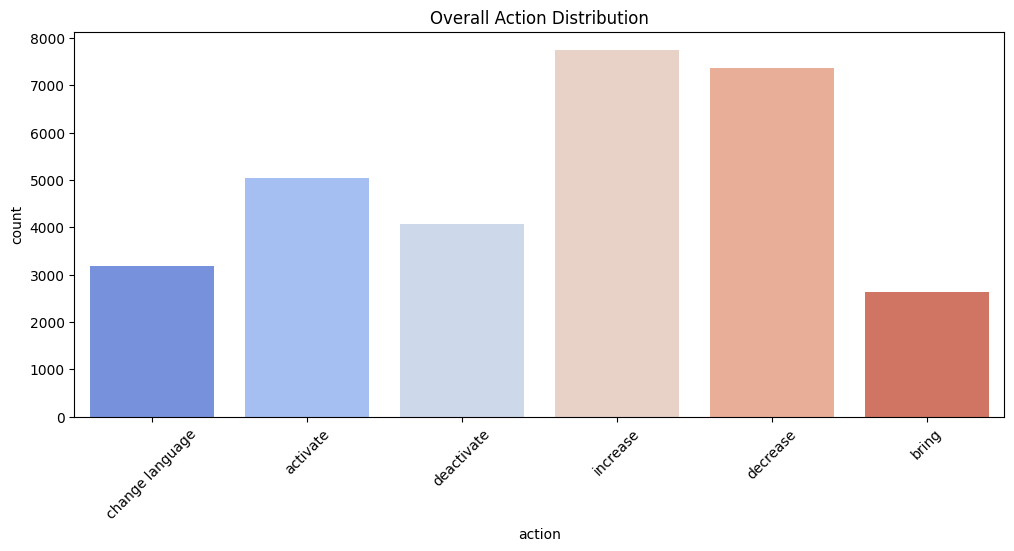

C:\Users\kasul\AppData\Local\Temp\ipykernel_32436\2567982617.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_df, x="object", palette="viridis")


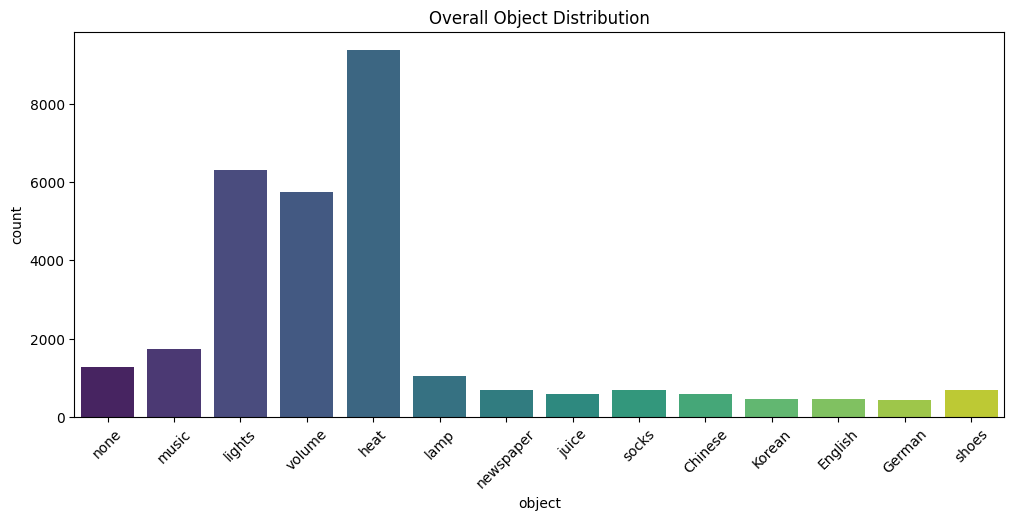

C:\Users\kasul\AppData\Local\Temp\ipykernel_32436\2567982617.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=full_df, x="location", palette="Blues")


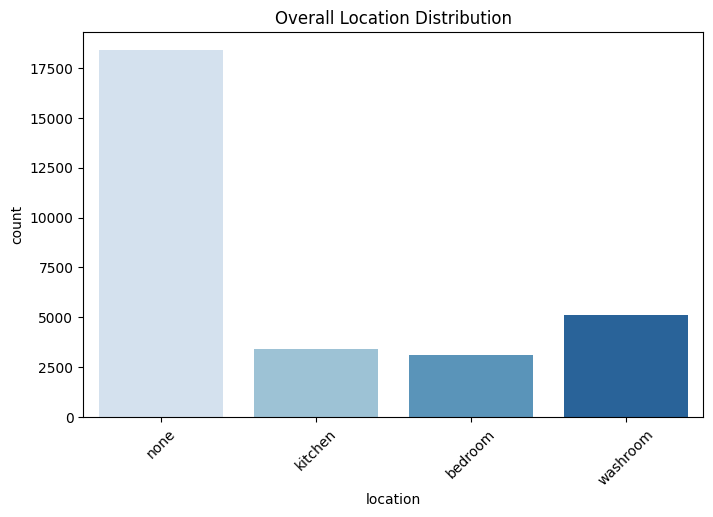

In [10]:
# Plot label distributions
plt.figure(figsize=(12, 5))
sns.countplot(data=full_df, x="action", palette="coolwarm")
plt.title("Overall Action Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(data=full_df, x="object", palette="viridis")
plt.title("Overall Object Distribution")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=full_df, x="location", palette="Blues")
plt.title("Overall Location Distribution")
plt.xticks(rotation=45)
plt.show()

In [11]:
# Speaker sample distribution
speaker_dist_train = train_df["speakerId"].value_counts()
speaker_dist_valid = valid_df["speakerId"].value_counts()
speaker_dist_test = test_df["speakerId"].value_counts()

In [12]:
speaker_duration_stats = full_df.groupby("speakerId")["duration"].describe()

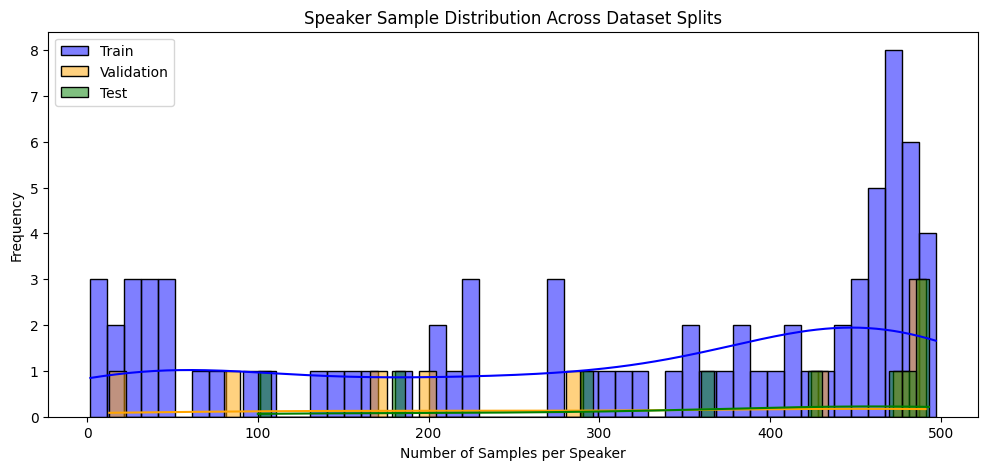

In [13]:
# Plot Speaker Sample Distribution
plt.figure(figsize=(12, 5))
sns.histplot(speaker_dist_train, bins=50, kde=True, color="blue", label="Train")
sns.histplot(speaker_dist_valid, bins=50, kde=True, color="orange", label="Validation")
sns.histplot(speaker_dist_test, bins=50, kde=True, color="green", label="Test")
plt.xlabel("Number of Samples per Speaker")
plt.ylabel("Frequency")
plt.title("Speaker Sample Distribution Across Dataset Splits")
plt.legend()
plt.show()

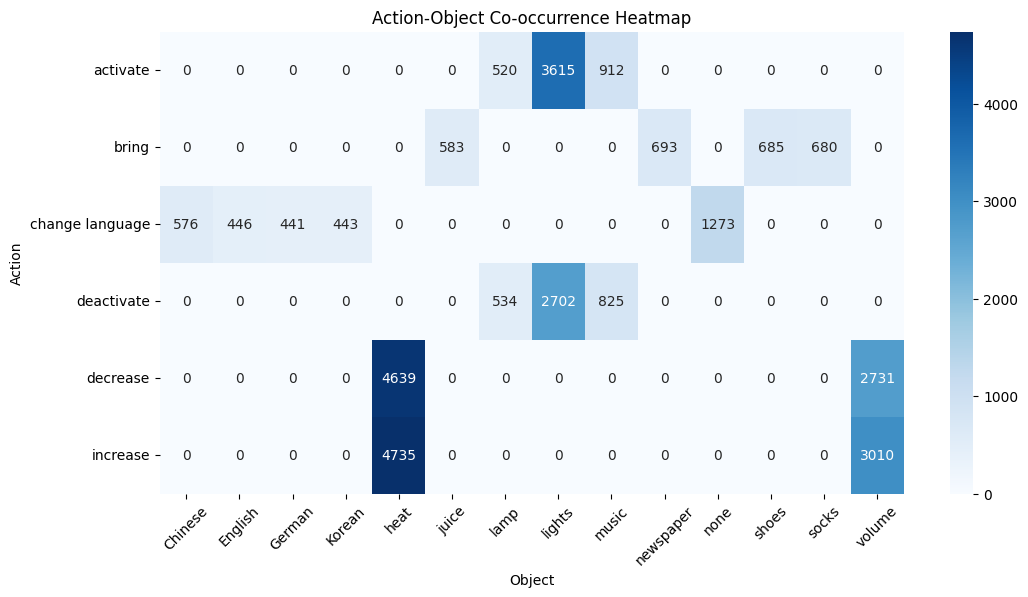

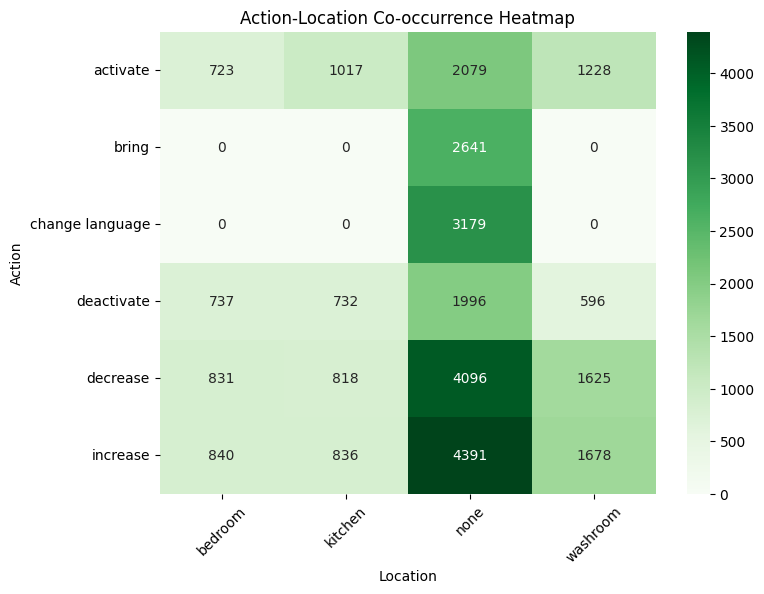

In [14]:
# Action-Object Co-occurrence Heatmap
action_object_matrix = full_df.pivot_table(index="action", columns="object", aggfunc="size", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(action_object_matrix, cmap="Blues", annot=True, fmt="d")
plt.title("Action-Object Co-occurrence Heatmap")
plt.xlabel("Object")
plt.ylabel("Action")
plt.xticks(rotation=45)
plt.show()

# Action-Location Co-occurrence Heatmap
action_location_matrix = full_df.pivot_table(index="action", columns="location", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(action_location_matrix, cmap="Greens", annot=True, fmt="d")
plt.title("Action-Location Co-occurrence Heatmap")
plt.xlabel("Location")
plt.ylabel("Action")
plt.xticks(rotation=45)
plt.show()

## Combining intents from the 3 different slots

In [15]:
# Create a new "intent" column by combining action, object, and location
train_df["intent"] = train_df["action"] + " " + train_df["object"] + " " + train_df["location"]
valid_df["intent"] = valid_df["action"] + " " + valid_df["object"] + " " + valid_df["location"]
test_df["intent"] = test_df["action"] + " " + test_df["object"] + " " + test_df["location"]

In [16]:
# Count unique intents in each dataset
intent_stats_train = train_df["intent"].value_counts()
intent_stats_valid = valid_df["intent"].value_counts()
intent_stats_test = test_df["intent"].value_counts()

In [17]:
# Create summary tables
intent_summary = pd.DataFrame({
    "Train": [len(intent_stats_train), intent_stats_train.min(), intent_stats_train.max(), intent_stats_train.mean()],
    "Validation": [len(intent_stats_valid), intent_stats_valid.min(), intent_stats_valid.max(), intent_stats_valid.mean()],
    "Test": [len(intent_stats_test), intent_stats_test.min(), intent_stats_test.max(), intent_stats_test.mean()]
}, index=["Unique Intents", "Min Samples per Intent", "Max Samples per Intent", "Mean Samples per Intent"])

intent_summary

,Train,Validation,Test
Unique Intents,31.000000,31.000000,31.000000
Min Samples per Intent,342.000000,40.000000,57.000000
Max Samples per Intent,2296.000000,318.000000,396.000000
Mean Samples per Intent,746.193548,100.580645,122.354839


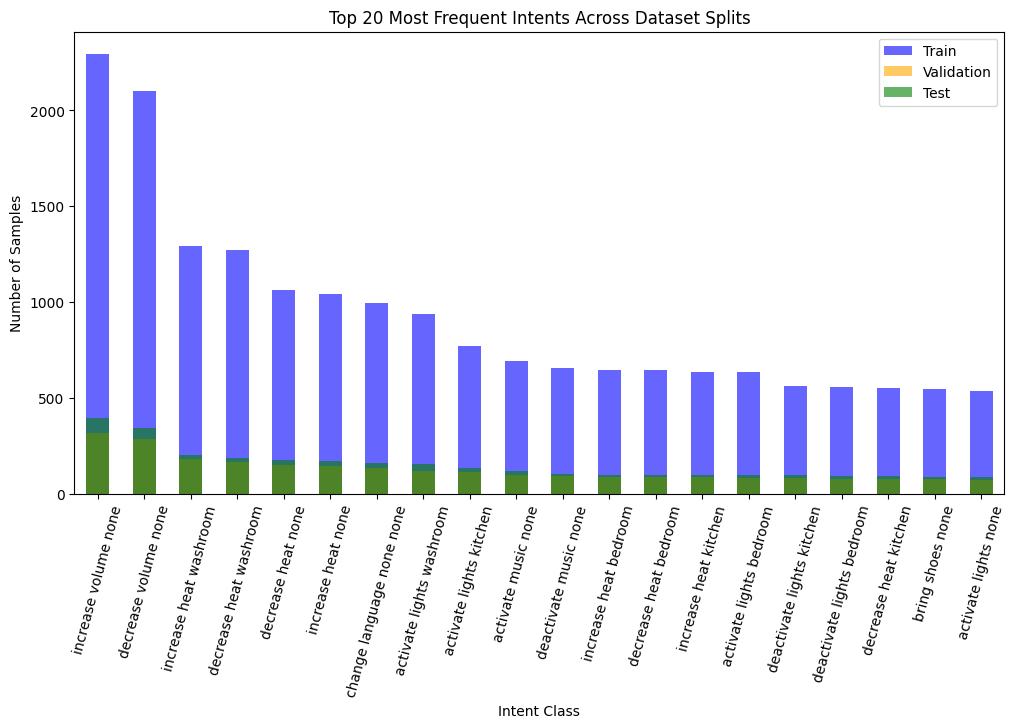

In [18]:

# Visualizing top intents with the highest frequency
top_n = 20
plt.figure(figsize=(12, 6))
intent_stats_train.head(top_n).plot(kind="bar", color="blue", alpha=0.6, label="Train")
intent_stats_valid.head(top_n).plot(kind="bar", color="orange", alpha=0.6, label="Validation")
intent_stats_test.head(top_n).plot(kind="bar", color="green", alpha=0.6, label="Test")
plt.xlabel("Intent Class")
plt.ylabel("Number of Samples")
plt.title(f"Top {top_n} Most Frequent Intents Across Dataset Splits")
plt.xticks(rotation=75)
plt.legend()
plt.show()

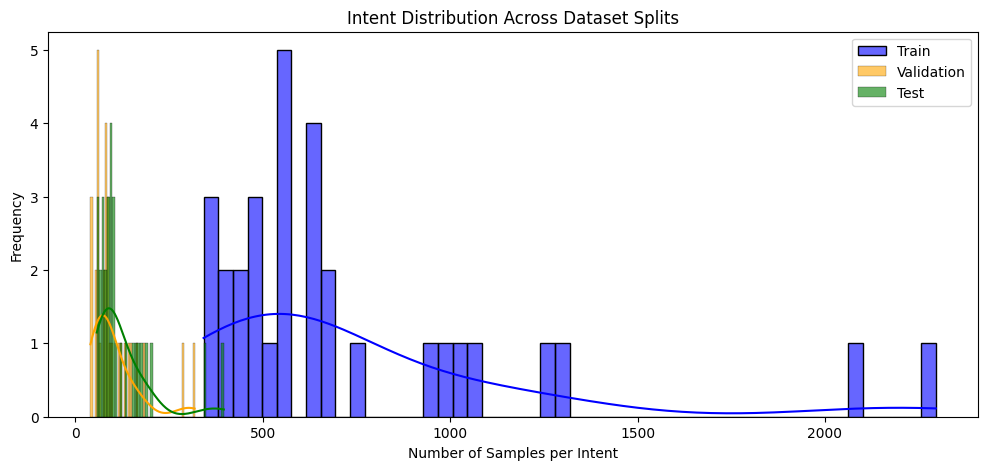

In [19]:
# Visualizing Intent Distribution
plt.figure(figsize=(12, 5))
sns.histplot(intent_stats_train, bins=50, kde=True, color="blue", label="Train", alpha=0.6)
sns.histplot(intent_stats_valid, bins=50, kde=True, color="orange", label="Validation", alpha=0.6)
sns.histplot(intent_stats_test, bins=50, kde=True, color="green", label="Test", alpha=0.6)
plt.xlabel("Number of Samples per Intent")
plt.ylabel("Frequency")
plt.title("Intent Distribution Across Dataset Splits")
plt.legend()
plt.show()